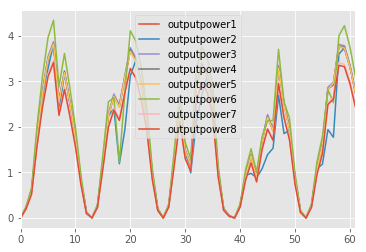

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
df = pd.read_csv('hfile.csv')
df = df.drop_duplicates()
da = df.filter(items=['InverterID', 'LogTime', 'OutputPower'])

def extract_machine(mid):
    d  = [row for row in da.itertuples() if row.InverterID == mid]
    df = pd.DataFrame(d)
    df = df.drop('Index', 1)
    df = df.drop('InverterID', 1)
    return df

# every machine is a independent dataframe
machines = [extract_machine(i) for i in range(1, 9)]

# rename columns label
for i in range(0,8):    
    newstr = 'outputpower{}'.format(i+1)
    machines[i].rename(columns={'OutputPower':newstr}, inplace=True) 

# make outputPower dataframe
from functools import reduce
outputpowerdf = reduce(lambda e1, e2:pd.merge(e1, e2, on='LogTime'), machines)

# draw
g = outputpowerdf.plot.line()
plt.show(g)

## calculate correlation

In [47]:
cor = outputpowerdf.corr()

,outputpower1,outputpower2,outputpower3,outputpower4,outputpower5,outputpower6,outputpower7,outputpower8
outputpower1,1.000000,0.965102,0.999973,0.999969,0.999958,0.984565,0.999918,0.999906
outputpower2,0.965102,1.000000,0.964427,0.964996,0.964505,0.984891,0.965376,0.964735
outputpower3,0.999973,0.964427,1.000000,0.999951,0.999964,0.984640,0.999910,0.999943
outputpower4,0.999969,0.964996,0.999951,1.000000,0.999963,0.984810,0.999918,0.999935
outputpower5,0.999958,0.964505,0.999964,0.999963,1.000000,0.984464,0.999970,0.999957
outputpower6,0.984565,0.984891,0.984640,0.984810,0.984464,1.000000,0.984731,0.984985
outputpower7,0.999918,0.965376,0.999910,0.999918,0.999970,0.984731,1.000000,0.999931
outputpower8,0.999906,0.964735,0.999943,0.999935,0.999957,0.984985,0.999931,1.000000


## find out minimal corr

In [49]:
cor.min()

outputpower1    0.965102
outputpower2    0.964427
outputpower3    0.964427
outputpower4    0.964996
outputpower5    0.964505
outputpower6    0.984464
outputpower7    0.965376
outputpower8    0.964735
dtype: float64

## draw average and variance

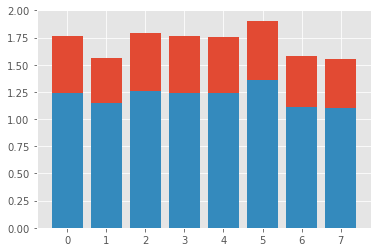

In [170]:
import statistics
mus = [statistics.mean(df.OutputPower) for df in mdfs]
sigmas = [statistics.stdev(df.OutputPower) for df in mdfs]

plt.bar(range(len(mus)), mus)
plt.bar(range(len(sigmas)), sigmas)
plt.show()